# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [3]:
df=pd.read_csv('FineTech_appData.csv')

# Exploratory Data Analysis

In [4]:
df.head() #Viewing the dataset

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,14:51.3,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,16:00.9,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,19:09.2,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,08:46.4,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,11:49.5,0
4,51549,50:48.7,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,56:37.8,1


In [5]:
for i in [1,2,3,4,5]:
    print(df.loc[i,'screen_list'],'\n') # Viewing all the screens 

joinscreen,product_review,product_review2,ScanPreview,VerifyDateOfBirth,location,VerifyCountry,VerifyPhone,VerifyToken,Institutions,Loan2 

Splash,Cycle,Loan 

product_review,Home,product_review,Loan3,Finances,Credit3,ReferralContainer,Leaderboard,Rewards,RewardDetail,ScanPreview,location,VerifyDateOfBirth,VerifyPhone,VerifySSN,Credit1,Credit2 

idscreen,joinscreen,Cycle,Credit3Container,ScanPreview,VerifyPhone,VerifySSN,Credit1,Loan2,Home,Institutions,SelectInstitution,BankVerification,ReferralContainer,product_review,product_review2,VerifyCountry,VerifyToken,product_review 

idscreen,Cycle,Home,ScanPreview,VerifyPhone,VerifySSN,Credit1,Credit3Dashboard,Loan2,Institutions,product_review,product_review,product_review3 



In [6]:
df.shape # checking the number of rows and columns

(50000, 12)

In [7]:
df.isnull().sum() # enrolled date has 18926 null values

user                        0
first_open                  0
dayofweek                   0
hour                        0
age                         0
screen_list                 0
numscreens                  0
minigame                    0
used_premium_feature        0
enrolled                    0
enrolled_date           18926
liked                       0
dtype: int64

In [8]:
df['enrolled_date'].fillna(method='ffill', inplace=True)  # Fill with previous valid date


In [9]:
df.info() # datatype of each feature is known

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   user                  50000 non-null  int64 
 1   first_open            50000 non-null  object
 2   dayofweek             50000 non-null  int64 
 3   hour                  50000 non-null  object
 4   age                   50000 non-null  int64 
 5   screen_list           50000 non-null  object
 6   numscreens            50000 non-null  int64 
 7   minigame              50000 non-null  int64 
 8   used_premium_feature  50000 non-null  int64 
 9   enrolled              50000 non-null  int64 
 10  enrolled_date         49997 non-null  object
 11  liked                 50000 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 4.6+ MB


In [10]:
df['hour']=df.hour.str.slice(1,3).astype(int)

In [11]:
from datetime import date, time, datetime
df['enrolled_date'] = pd.to_datetime(df['enrolled_date'], errors='coerce')
df['first_open'] = pd.to_datetime(df['first_open'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   user                  50000 non-null  int64         
 1   first_open            20227 non-null  datetime64[ns]
 2   dayofweek             50000 non-null  int64         
 3   hour                  50000 non-null  int32         
 4   age                   50000 non-null  int64         
 5   screen_list           50000 non-null  object        
 6   numscreens            50000 non-null  int64         
 7   minigame              50000 non-null  int64         
 8   used_premium_feature  50000 non-null  int64         
 9   enrolled              50000 non-null  int64         
 10  enrolled_date         20798 non-null  datetime64[ns]
 11  liked                 50000 non-null  int64         
dtypes: datetime64[ns](2), int32(1), int64(8), object(1)
memory usage: 4.4+ MB


In [12]:
# Check the average age of enrolled users
average_age_enrolled = df.loc[df['enrolled'] == 1, 'age'].mean()
print("Average Age of Enrolled Users:", average_age_enrolled)

Average Age of Enrolled Users: 30.617332818433418


In [13]:
# Check the average number of screens viewed by enrolled users
average_screens_enrolled = df.loc[df['enrolled'] == 1, 'numscreens'].mean()
print("Average Number of Screens Viewed by Enrolled Users:", average_screens_enrolled)

Average Number of Screens Viewed by Enrolled Users: 23.666988479114373


In [14]:
# Check the average number of screens viewed by enrolled users
average_screens_enrolled = df.loc[df['enrolled'] == 1, 'numscreens'].mean()
print("Average Number of Screens Viewed by Enrolled Users:", average_screens_enrolled)

Average Number of Screens Viewed by Enrolled Users: 23.666988479114373


In [15]:
# Calculate the percentage of users who liked the app
percentage_liked = df['liked'].mean() * 100
print("Percentage of Users Who Liked the App:", percentage_liked)

Percentage of Users Who Liked the App: 16.5


In [16]:
# Group by 'dayofweek' and calculate the average age for each day
average_age_by_day = df.groupby('dayofweek')['age'].mean()
print("Average Age by Day of the Week:\n", average_age_by_day)

Average Age by Day of the Week:
 dayofweek
0    31.592681
1    31.964701
2    31.970388
3    32.062171
4    31.820608
5    31.249495
6    31.491238
Name: age, dtype: float64


In [17]:
# Group by 'dayofweek' and calculate the enrollment rate for each day
enrollment_rate_by_day = df.groupby('dayofweek')['enrolled'].mean() * 100
print("Enrollment Rate by Day of the Week:\n", enrollment_rate_by_day)

Enrollment Rate by Day of the Week:
 dayofweek
0    61.290752
1    60.442639
2    62.850356
3    63.943535
4    61.014474
5    63.114644
6    62.631437
Name: enrolled, dtype: float64


In [18]:
# Group by 'hour' and calculate the average number of screens for each hour
average_screens_by_hour = df.groupby('hour')['numscreens'].mean()
print("Average Number of Screens by Hour:\n", average_screens_by_hour)

Average Number of Screens by Hour:
 hour
0     22.779445
1     22.900738
2     23.172992
3     20.003707
4     24.561821
5     24.164968
6     24.480904
7     20.364047
8     23.275056
9     20.933766
10    21.802120
11    19.427543
12    22.471211
13    17.879753
14    21.722824
15    20.857812
16    22.092115
17    17.757382
18    21.752657
19    17.847120
20    21.873669
21    18.293054
22    22.298077
23    18.059962
Name: numscreens, dtype: float64


In [19]:
df.describe() # statitical insights about features

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,12.557220,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,7.438072,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,5.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,14.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,19.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,23.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


1. Average age of user is 31
2. 21 screesns are visited on an average
3. 62% of the user have enrolled to premium feature on an average

# Visualizations

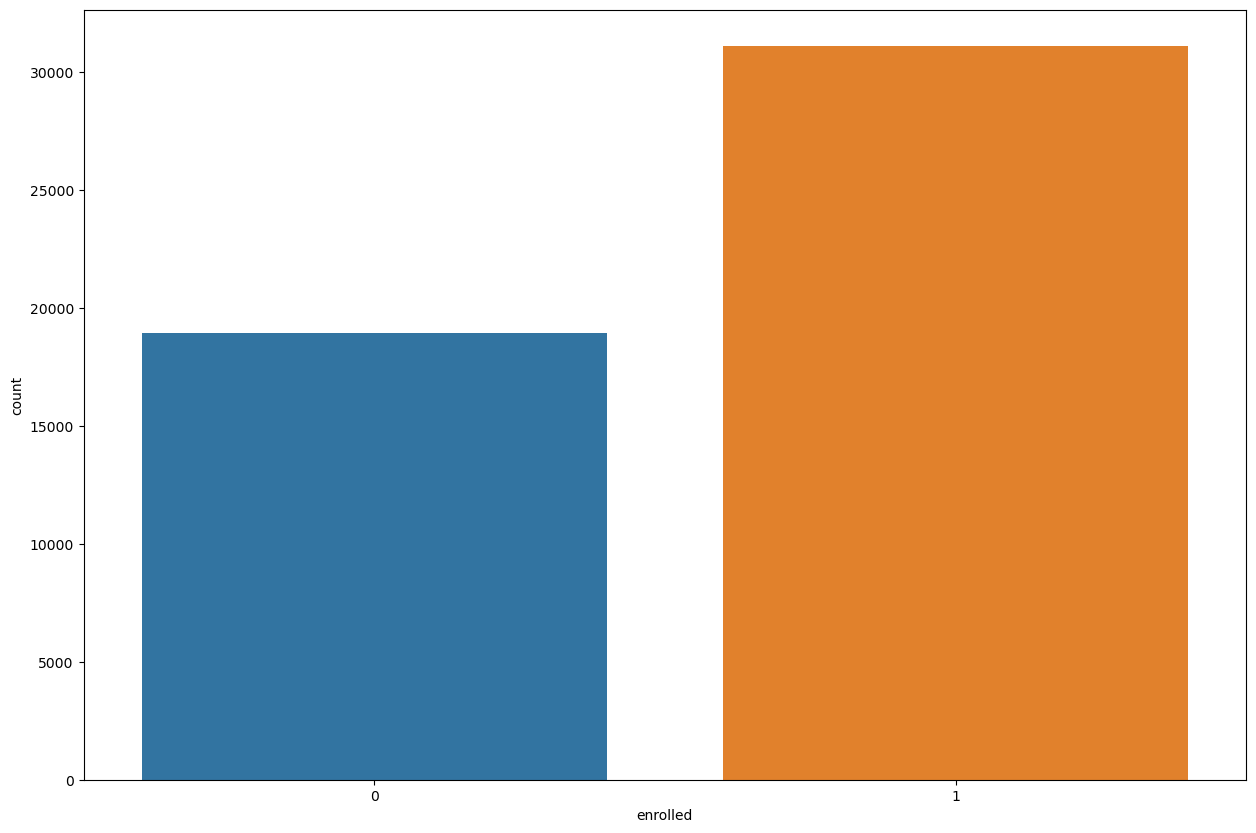

In [20]:
# Count plot of enrolled 
plt.figure(figsize=(15,10))
sns.countplot(data=df,x='enrolled')
plt.show()

 Most have them have enrolled 

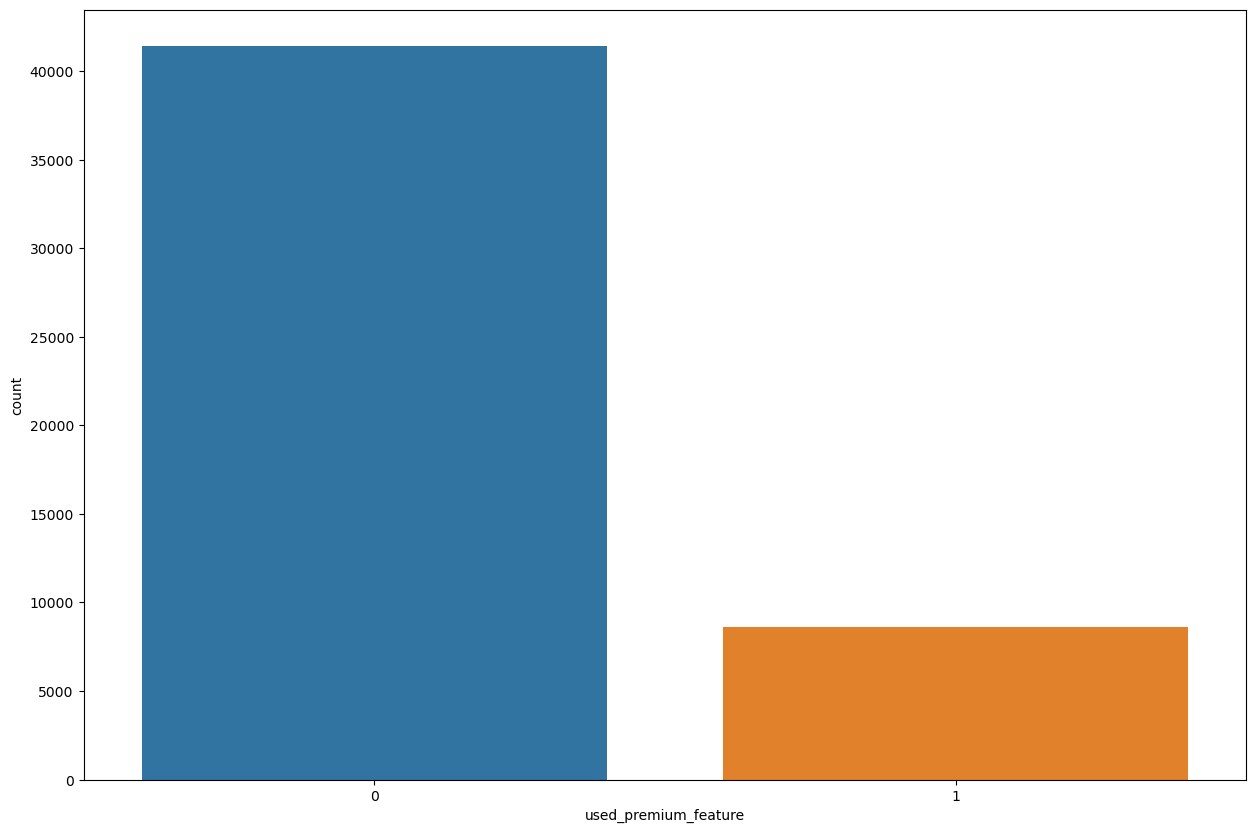

In [21]:
#countplot of used premium 
plt.figure(figsize=(15,10))
sns.countplot(data=df,x='used_premium_feature')
plt.show()

Only few of them have used premium feature

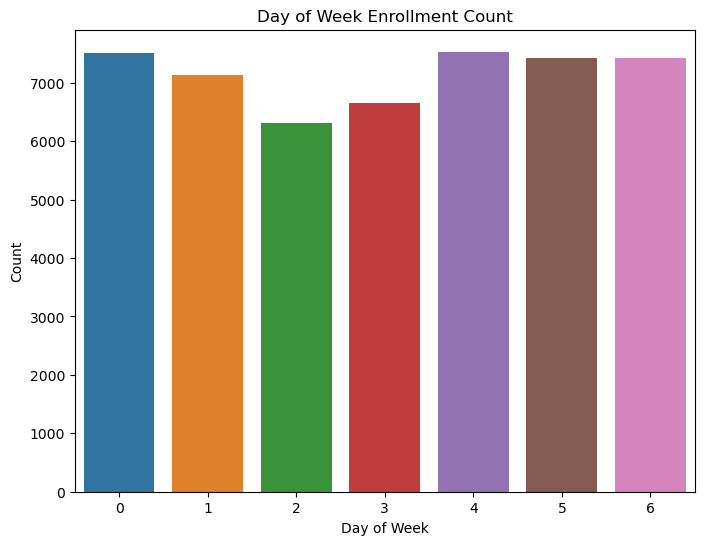

In [22]:
# countplot of day of week
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='dayofweek')
plt.title('Day of Week Enrollment Count')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.show()

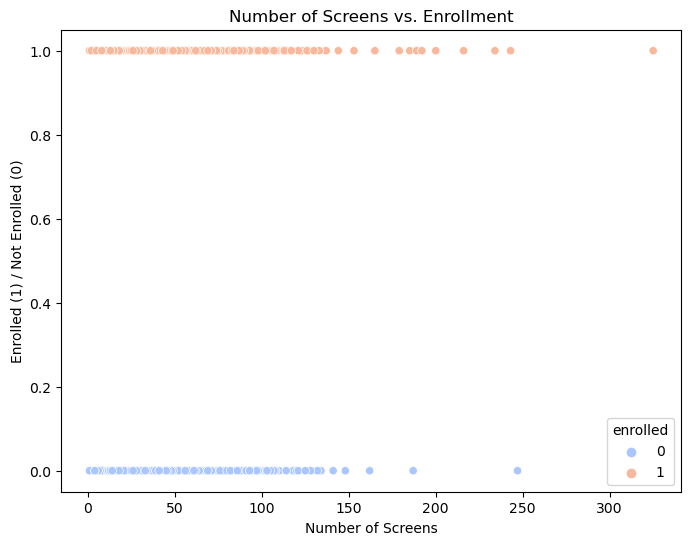

In [23]:
# Scatter plot of 'numscreens' vs. 'enrolled'
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='numscreens', y='enrolled', hue='enrolled', palette='coolwarm')
plt.title('Number of Screens vs. Enrollment')
plt.xlabel('Number of Screens')
plt.ylabel('Enrolled (1) / Not Enrolled (0)')
plt.show()

No correlation between the features

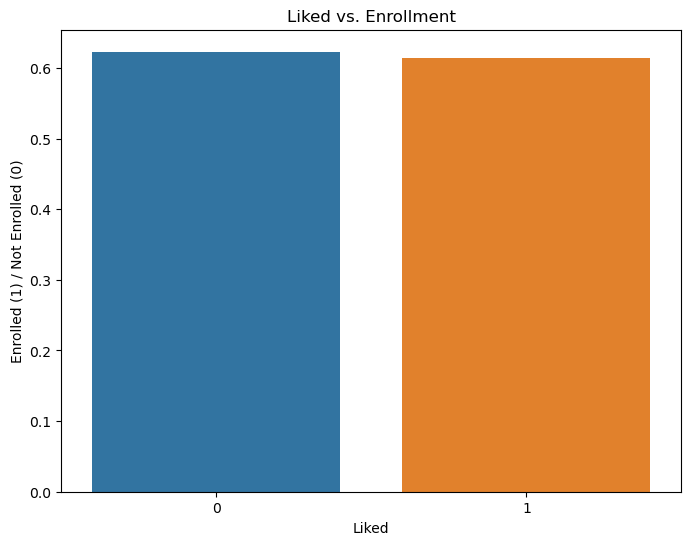

In [24]:
#barplot of liked vs enrolled
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='liked', y='enrolled', ci=None)
plt.title('Liked vs. Enrollment')
plt.xlabel('Liked')
plt.ylabel('Enrolled (1) / Not Enrolled (0)')
plt.show()

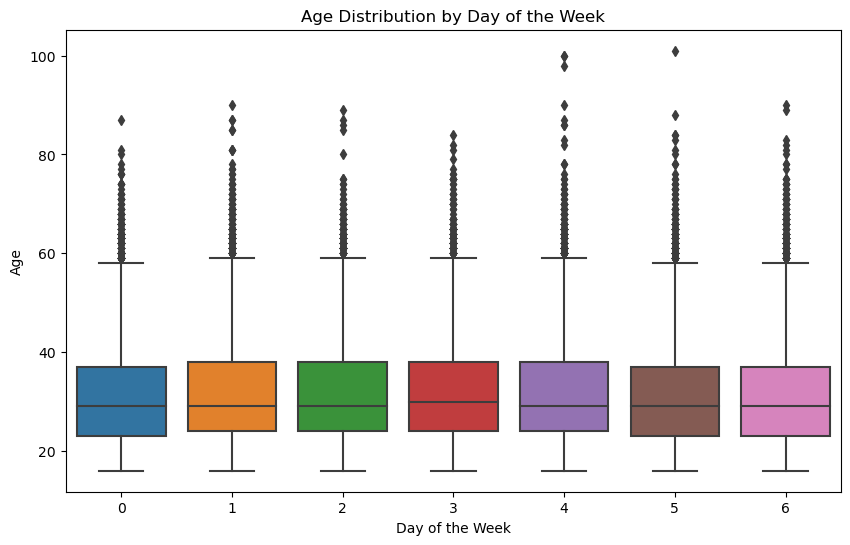

In [25]:
# Boxplot of 'age' by 'dayofweek'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='dayofweek', y='age')
plt.title('Age Distribution by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Age')
plt.show()

In [26]:
df_numerical=df.copy().drop(columns=['user','first_open','screen_list','enrolled_date','enrolled'])

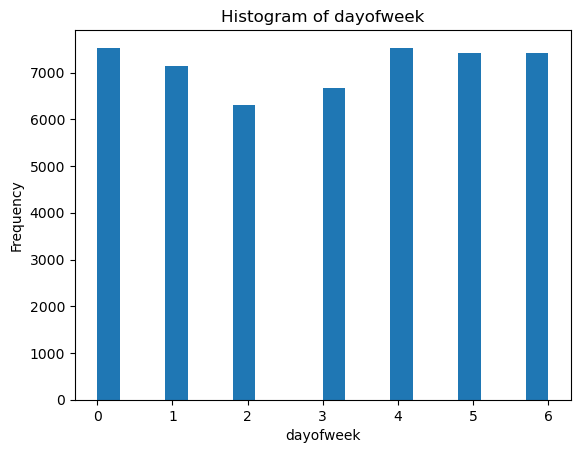

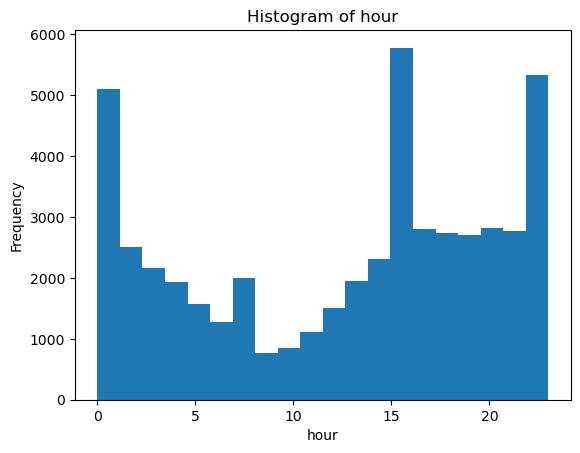

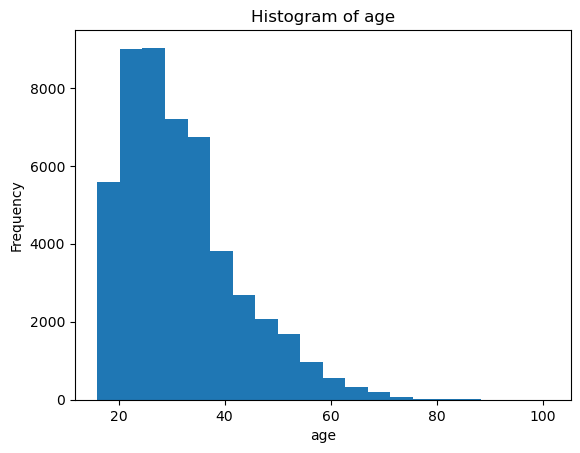

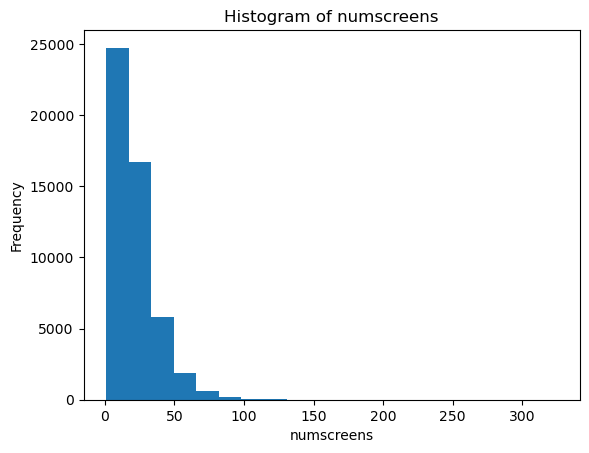

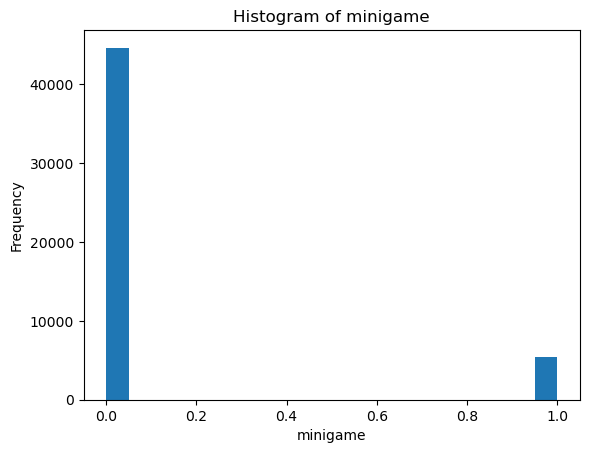

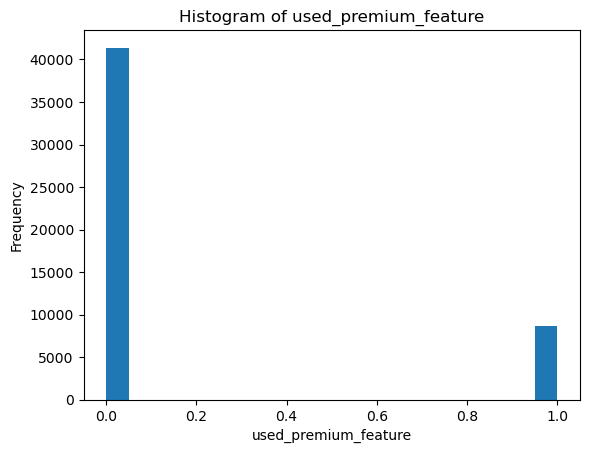

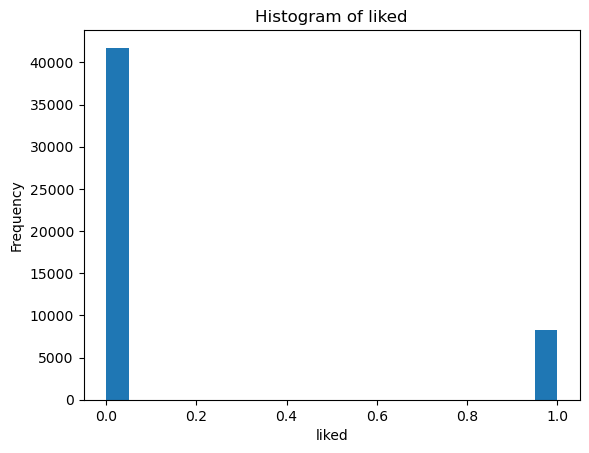

In [27]:
for column in df_numerical:
    plt.hist(df[column], bins=20)  
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title('Histogram of ' + column)
    plt.show()

In [28]:
df['time_to_enrolled']  = (df.enrolled_date - df.first_open).astype('timedelta64[h]')


(array([7749., 1158.,   82.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

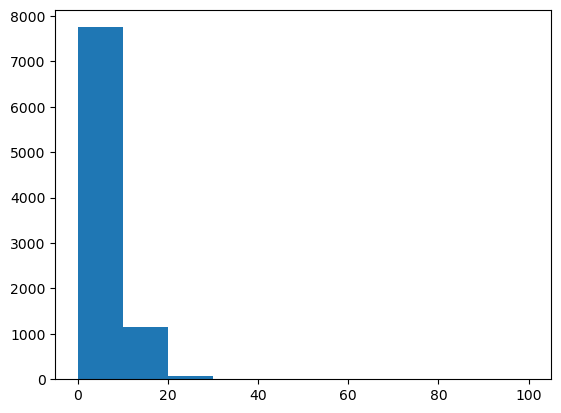

In [29]:
plt.hist(df['time_to_enrolled'].dropna(), range = (0,100)) 

After 30 hours no enrollment has been done .

# Feature Selection

In [30]:
df.loc[df.time_to_enrolled > 30, 'enrolled'] = 0

In [31]:
df.drop(columns = ['time_to_enrolled', 'enrolled_date', 'first_open'], inplace=True)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   user                  50000 non-null  int64 
 1   dayofweek             50000 non-null  int64 
 2   hour                  50000 non-null  int32 
 3   age                   50000 non-null  int64 
 4   screen_list           50000 non-null  object
 5   numscreens            50000 non-null  int64 
 6   minigame              50000 non-null  int64 
 7   used_premium_feature  50000 non-null  int64 
 8   enrolled              50000 non-null  int64 
 9   liked                 50000 non-null  int64 
dtypes: int32(1), int64(8), object(1)
memory usage: 3.6+ MB


In [33]:
fineTech_app_screen_Data = pd.read_csv("top_screens.csv").top_screens.values #


In [34]:
fineTech_app_screen_Data

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

The ‘Screen_list’ contains string values but we can’t use it directly. So to solve this problem we are taking each screen name from ‘fineTech_app_screen_Data’ and append as a column by the same name to ‘fineTech_appData’. Then check this screen name is available in ‘screen_list’ if it is available then add value 1 else 0 in the appended column.

In [35]:
for screen_name in fineTech_app_screen_Data:
    df[screen_name] = df.screen_list.str.contains(screen_name).astype(int)
    df['screen_list'] = df.screen_list.str.replace(screen_name+",", "") #

In [36]:
# get shape
df.shape

(50000, 68)

In [37]:
# remain screen in 'screen_list'
df.loc[0,'screen_list']

'joinscreen,product_review,ScanPreview,VerifyToken,ProfileVerifySSN,Settings,ForgotPassword,Login'

In [38]:
# count remain screen list and store counted number in 'remain_screen_list' 
df['remain_screen_list'] = df.screen_list.str.count(",")

In [39]:
df.drop(columns = ['screen_list'], inplace=True)

In [40]:
df.columns

Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'enrolled', 'liked', 'Loan2', 'location',
       'Institutions', 'Credit3Container', 'VerifyPhone', 'BankVerification',
       'VerifyDateOfBirth', 'ProfilePage', 'VerifyCountry', 'Cycle',
       'idscreen', 'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash',
       'Loan', 'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts', 'Saving8',
       'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile', 'VerifyHousing',
       'RewardDetail', 'VerifyHousingAmount', 'ProfileMaritalStatus',
       'ProfileChildren ', 'ProfileEducation', 'Saving7',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'Saving2', 'Saving6', 'Saving2Amount', 'Saving5',
       'ProfileJobTitle', 'Login', 'ProfileEmploymentLength', 'WebView',
       'SecurityModal', 'Loan4', 'ResendTok

In [41]:
# take sum of all saving screen in one place 
saving_screens = ['Saving1',
                  'Saving2',
                  'Saving2Amount',
                  'Saving4',
                  'Saving5',
                  'Saving6',
                  'Saving7',
                  'Saving8',
                  'Saving9',
                  'Saving10',
                 ]
df['saving_screens_count'] = df[saving_screens].sum(axis = 1)
df.drop(columns = saving_screens, inplace = True)


credit_screens = ['Credit1',
                  'Credit2',
                  'Credit3',
                  'Credit3Container',
                  'Credit3Dashboard',
                 ]
df['credit_screens_count'] = df[credit_screens].sum(axis = 1)
df.drop(columns = credit_screens, axis = 1, inplace = True)

cc_screens = ['CC1',
              'CC1Category',
              'CC3',
             ]
df['cc_screens_count'] = df[cc_screens].sum(axis = 1)
df.drop(columns = cc_screens, inplace = True)

loan_screens = ['Loan',
                'Loan2',
                'Loan3',
                'Loan4',
               ]
df['loan_screens_count'] = df[loan_screens].sum(axis = 1)
df.drop(columns = loan_screens, inplace = True)

In [42]:
df.shape

(50000, 50)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 50 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   user                     50000 non-null  int64
 1   dayofweek                50000 non-null  int64
 2   hour                     50000 non-null  int32
 3   age                      50000 non-null  int64
 4   numscreens               50000 non-null  int64
 5   minigame                 50000 non-null  int64
 6   used_premium_feature     50000 non-null  int64
 7   enrolled                 50000 non-null  int64
 8   liked                    50000 non-null  int64
 9   location                 50000 non-null  int32
 10  Institutions             50000 non-null  int32
 11  VerifyPhone              50000 non-null  int32
 12  BankVerification         50000 non-null  int32
 13  VerifyDateOfBirth        50000 non-null  int32
 14  ProfilePage              50000 non-null  int32
 15  Ve

In [44]:
df.describe()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,remain_screen_list,saving_screens_count,credit_screens_count,cc_screens_count,loan_screens_count
count,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.0000
mean,186889.729900,3.029860,12.557220,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000,0.517760,...,0.014220,0.013340,0.013400,0.008200,0.007580,5.766780,0.365020,0.960500,0.177520,0.8238
std,107768.520361,2.031997,7.438072,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184,0.499689,...,0.118398,0.114727,0.114981,0.090183,0.086733,3.680225,1.405511,1.257701,0.614406,0.7128
min,13.000000,0.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000
25%,93526.750000,1.000000,5.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.0000
50%,187193.500000,3.000000,14.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,1.0000
75%,279984.250000,5.000000,19.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,2.000000,0.000000,1.0000
max,373662.000000,6.000000,23.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,10.000000,5.000000,3.000000,3.0000


# Data preprocessing

In [45]:
target = df['enrolled']
df.drop(columns = 'enrolled', inplace = True)

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size = 0.2, random_state = 20)

# Feature Scaling

In [47]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [48]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [49]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


# Model Building

In [50]:
# training the test data
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train_sc, y_train)
y_pred = xgb_model.predict(X_test_sc)
accuracy_score(y_test, y_pred)

0.785

In [51]:
y_pred_train = xgb_model.predict(X_train_sc)
accuracy_score(y_train, y_pred_train)

0.8435

In [52]:
# XGB classifier with parameter tuning
xgb_model = XGBClassifier(
 learning_rate =0.01,
 n_estimators=5000,
 max_depth=4,
 min_child_weight=5,
 gamma=0,
 reg_alpha=0.004,
 objective= 'binary:logistic',
 nthread=3,
 scale_pos_weight=1,
 seed=27)
 
xgb_model.fit(X_train_sc, y_train)
y_pred = xgb_model.predict(X_test_sc) 
accuracy_score(y_test, y_pred)

0.7835

Text(0.5, 1.0, 'Confussion Matrix')

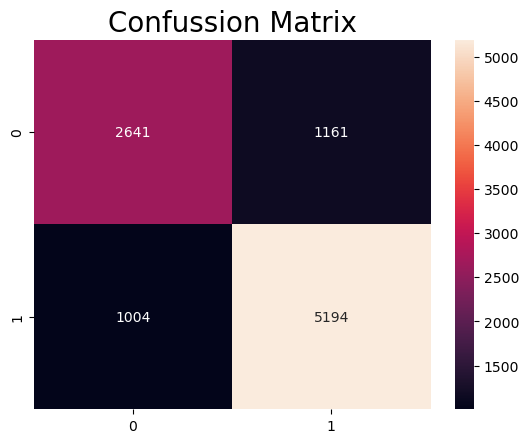

In [53]:
# confussion matrix
cm_xgb = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_xgb, annot = True, fmt = 'g')
plt.title("Confussion Matrix", fontsize = 20)

In [54]:
# Clasification Report
cr_xgb = classification_report(y_test, y_pred) 
print("Classification report >>> \n", cr_xgb)

Classification report >>> 
               precision    recall  f1-score   support

           0       0.72      0.69      0.71      3802
           1       0.82      0.84      0.83      6198

    accuracy                           0.78     10000
   macro avg       0.77      0.77      0.77     10000
weighted avg       0.78      0.78      0.78     10000



# Deployment

In [55]:
# Pickle
import pickle
 
# save model
pickle.dump(xgb_model, open('customer_subscription_analysis.pickle', 'wb'))
 
# load model
ml_model_pl = pickle.load(open('customer_subscription_analysis.pickle', 'rb'))
 
# predict the output
y_pred_pl = ml_model_pl.predict(X_test_sc)
 
# confusion matrix
cm_pl = confusion_matrix(y_test, y_pred)
print('Confussion matrix = \n', cm_pl)
 
# show the accuracy
print("Accuracy of model = ",accuracy_score(y_test, y_pred_pl))

Confussion matrix = 
 [[2641 1161]
 [1004 5194]]
Accuracy of model =  0.7835
